# **Data Loading & Setup**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import logging
import os
import sys

In [2]:
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [3]:
# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
# Configure logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

logger.info("Imported libraries and configured logging.")

2025-01-03 18:41:52,387 - INFO - Imported libraries and configured logging.


In [5]:
# Import load_data
from load_data import load_data

if __name__ == "__main__":
    # Define file paths and names
    zip_file_path = '../data/rossmann-store-sales.zip'
    extract_to_folder = '../data'
    train = 'train.csv'
    test = 'test.csv'
    store = 'store.csv'

    # Load the dataset
    try:
        train_data = load_data(zip_file_path, train, extract_to_folder)
        test_data = load_data(zip_file_path, test, extract_to_folder)
        store_data = load_data(zip_file_path, store, extract_to_folder)
        print("Data successfully loaded.")
        display(train_data.head(10))
    except FileNotFoundError as e:
        logger.error(e)

    logger.info("Data loaded successfully.")

ValueError encountered while loading the CSV. Attempting to fix...
ValueError encountered while loading the CSV. Attempting to fix...
Data successfully loaded.


,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1
6,5,2015-07-31,5651,589,1,1,0,1
7,5,2015-07-31,15344,1414,1,1,0,1
8,5,2015-07-31,8492,833,1,1,0,1
9,5,2015-07-31,8565,687,1,1,0,1


2025-01-03 18:41:56,423 - INFO - Data loaded successfully.


**Display the first 10 train_data**

In [6]:
# Explore the train data
train_data.head(10)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1
6,5,2015-07-31,5651,589,1,1,0,1
7,5,2015-07-31,15344,1414,1,1,0,1
8,5,2015-07-31,8492,833,1,1,0,1
9,5,2015-07-31,8565,687,1,1,0,1


**Display the first 10 test_data**

In [7]:
# Explore the testing data
test_data.head(10)

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
Id,,,,,,,
1,1,4,2015-09-17,1.0,1,0,0
2,3,4,2015-09-17,1.0,1,0,0
3,7,4,2015-09-17,1.0,1,0,0
4,8,4,2015-09-17,1.0,1,0,0
5,9,4,2015-09-17,1.0,1,0,0
6,10,4,2015-09-17,1.0,1,0,0
7,11,4,2015-09-17,1.0,1,0,0
8,12,4,2015-09-17,1.0,1,0,0
9,13,4,2015-09-17,1.0,1,0,0


**Display the first 10 store_data**

In [8]:
# Explore the store dataset
store_data.head(10)

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,0.0,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,0.0,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,0.0,NaN
6,a,a,310.0,12.0,2013.0,0,NaN,0.0,NaN
7,a,c,24000.0,4.0,2013.0,0,NaN,0.0,NaN
8,a,a,7520.0,10.0,2014.0,0,NaN,0.0,NaN
9,a,c,2030.0,8.0,2000.0,0,NaN,0.0,NaN


Now, We merge the store dataset with the train and test dataset on the same store to have rich set of data for analysis

In [9]:
# Logging the merging process for train and test datasets with store data
logger.info("Starting the merging process: combining store data with train and test datasets.")

# Merge store data with train data using 'Store' as the key
print("Merging store data with train dataset...")
_train_data = train_data.merge(store_data, on='Store', how='left')
print("Train dataset successfully merged with store data.")

# Merge store data with test data using 'Store' as the key
print("Merging store data with test dataset...")
_test_data = test_data.merge(store_data, on='Store', how='left')
print("Test dataset successfully merged with store data.")


2025-01-03 18:42:08,215 - INFO - Starting the merging process: combining store data with train and test datasets.


Merging store data with train dataset...
Train dataset successfully merged with store data.
Merging store data with test dataset...
Test dataset successfully merged with store data.


In [10]:
# Now let's explore to understand the nature of the merged data
_train_data.head(10)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,0.0,NaN
2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,0.0,NaN
5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,0.0,NaN
6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,0.0,NaN
7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,0.0,NaN
8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,0.0,NaN
9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,0.0,NaN


In [11]:
# Info the train data
_train_data.info(10)

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1 to 1115
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo2              

In [12]:
# Log the process of generating statistical summaries
logger.info("Generating statistical summaries for numerical data in train and test datasets.")

# Display statistical summary of numerical data in the train dataset
print("Displaying statistical summary for the train dataset...")
train_summary = train_data.describe()
display(train_summary)
logger.info("Statistical summary for the train dataset generated successfully.")

# Display statistical summary of numerical data in the test dataset
print("Displaying statistical summary for the test dataset...")
test_summary = test_data.describe()
display(test_summary)
logger.info("Statistical summary for the test dataset generated successfully.")


2025-01-03 18:42:15,039 - INFO - Generating statistical summaries for numerical data in train and test datasets.


Displaying statistical summary for the train dataset...


,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


2025-01-03 18:42:15,215 - INFO - Statistical summary for the train dataset generated successfully.


Displaying statistical summary for the test dataset...


,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,555.899533,3.979167,0.854322,0.395833,0.443487
std,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,279.750000,2.000000,1.000000,0.000000,0.000000
50%,553.500000,4.000000,1.000000,0.000000,0.000000
75%,832.250000,6.000000,1.000000,1.000000,1.000000
max,1115.000000,7.000000,1.000000,1.000000,1.000000


2025-01-03 18:42:15,228 - INFO - Statistical summary for the test dataset generated successfully.


In [13]:
# Display the shape of the merged datasets
print("Checking the shape of the merged datasets...")

# Log and print the shape of the training dataset
train_shape = _train_data.shape
print(f"Shape of the training dataset: {train_shape} (Rows: {train_shape[0]}, Columns: {train_shape[1]})")

# Log and print the shape of the testing dataset
test_shape = _test_data.shape
print(f"Shape of the testing dataset: {test_shape} (Rows: {test_shape[0]}, Columns: {test_shape[1]})")


Checking the shape of the merged datasets...
Shape of the training dataset: (1017209, 17) (Rows: 1017209, Columns: 17)
Shape of the testing dataset: (41088, 16) (Rows: 41088, Columns: 16)


In [14]:
logger.info("Checking the types of both test and train data")

from data_processing import DataProcessing

# Create instance of the class
train_data = _train_data.copy()
test_data = _test_data.copy()
process = DataProcessing(test_data, train_data)

# Check the types of both test and train data
process.check_data_types()

2025-01-03 18:42:20,526 - INFO - Checking the types of both test and train data


Training Dataset Data Types:

DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


Test Dataset Data Types:

Store                          int64
DayOfWeek                      int64
Date                          object
Open                         float64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Ass

In [15]:
# Convert the 'Date' column to datetime64 format in the training dataset
train_data['Date'] = pd.to_datetime(train_data['Date'])
# Print confirmation of conversion for training data
print("Training data 'Date' column converted to datetime64.")

# Convert the 'Date' column to datetime64 format in the testing dataset
test_data['Date'] = pd.to_datetime(test_data['Date'])
# Print confirmation of conversion for testing data
print("Testing data 'Date' column converted to datetime64.")

Training data 'Date' column converted to datetime64.
Testing data 'Date' column converted to datetime64.


# Handle Missing Data

This section addresses missing values in key features:

- **Identify** missing values in critical fields:
  - `CompetitionDistance`
  - `Promo2Since`
  - `Sales`

- **Impute** missing values using:
  - **Forward-filling** for time-based variables
  - **Median/Mean** for continuous features

By effectively managing missing data, we enhance the quality and reliability of our analysis.

In [16]:
# Log information about the missing values check
logger.info("Checking the missing values")

# Display summary of missing values in the training dataset
print('Summary of Missing Values in Train Data:')
display(process.missing_data_summary(train_data))

# Display summary of missing values in the testing dataset
print('Summary of Missing Values in Test Data:')
display(process.missing_data_summary(test_data))

2025-01-03 18:42:26,549 - INFO - Checking the missing values


Summary of Missing Values in Train Data:


,Missing Count,Percentage (%)
PromoInterval,508031,49.943620
Promo2SinceWeek,508031,49.943620
CompetitionOpenSinceYear,323348,31.787764
CompetitionOpenSinceMonth,323348,31.787764
CompetitionDistance,2642,0.259730


Summary of Missing Values in Test Data:


,Missing Count,Percentage (%)
Promo2SinceWeek,17232,41.939252
PromoInterval,17232,41.939252
CompetitionOpenSinceYear,15216,37.032710
CompetitionOpenSinceMonth,15216,37.032710
CompetitionDistance,96,0.233645
Open,11,0.026772


In [17]:
# Log information about dropping columns with high missing percentages
logger.info("Dropping columns with high missing percentage")

# List of columns to drop due to high missing values
cols_to_drop = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

# Drop specified columns from both training and testing datasets
train_data.drop(columns=cols_to_drop, axis=1, inplace=True)
test_data.drop(columns=cols_to_drop, axis=1, inplace=True)

# Log and print confirmation of dropped columns
logger.info(f"Dropped columns: {cols_to_drop}")
print("Dropped columns from datasets:", cols_to_drop)

2025-01-03 18:42:50,978 - INFO - Dropping columns with high missing percentage
2025-01-03 18:42:51,043 - INFO - Dropped columns: ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


Dropped columns from datasets: ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


## Handling Missing Data for Competition Columns

### Columns Affected:
- **CompetitionOpenSinceMonth** (31.78% missing)
- **CompetitionOpenSinceYear** (31.78% missing)

### Impact:
A significant portion of data is missing from these columns. However, they provide valuable insights into when competition began, which can significantly influence sales trends.

### Recommended Action:
- Consider imputing missing values using techniques such as:
  - **Forward-filling** based on available time data
  - **Mean/Median** imputation for numerical representation

By addressing the missing data in these columns, we can enhance our model's accuracy and predictive power.

In [18]:
# Log information about imputing missing values
logger.info("Imputing missing values for CompetitionOpenSinceMonth and CompetitionOpenSinceYear")

# Impute missing values for 'CompetitionOpenSinceMonth' using mode
competition_month_mode = train_data['CompetitionOpenSinceMonth'].mode()[0]
train_data['CompetitionOpenSinceMonth'] = train_data['CompetitionOpenSinceMonth'].fillna(competition_month_mode)

# Impute missing values for 'CompetitionOpenSinceYear' using mode
competition_year_mode = train_data['CompetitionOpenSinceYear'].mode()[0]
train_data['CompetitionOpenSinceYear'] = train_data['CompetitionOpenSinceYear'].fillna(competition_year_mode)

# Log confirmation of the imputation process
logger.info("Imputation completed for CompetitionOpenSinceMonth and CompetitionOpenSinceYear")

2025-01-03 18:42:55,012 - INFO - Imputing missing values for CompetitionOpenSinceMonth and CompetitionOpenSinceYear
2025-01-03 18:42:55,047 - INFO - Imputation completed for CompetitionOpenSinceMonth and CompetitionOpenSinceYear


In [19]:
# Log information about imputing CompetitionDistance with median
logger.info("Imputing CompetitionDistance with median")

# Store missing CompetitionDistance for later analysis
missing_competition = train_data[train_data['CompetitionDistance'].isna()]

# Impute CompetitionDistance with median for both training and test datasets
median_competition_distance = train_data['CompetitionDistance'].median()
train_data['CompetitionDistance'] = train_data['CompetitionDistance'].fillna(median_competition_distance)
test_data['CompetitionDistance'] = test_data['CompetitionDistance'].fillna(median_competition_distance)

# Log the imputation process for CompetitionDistance
logger.info("Imputation completed for CompetitionDistance")

# Impute Open column in test data with mode
logger.info("Imputing Open column in test data with mode")
mode_open = test_data['Open'].mode()[0]
test_data['Open'] = test_data['Open'].fillna(mode_open)

# Log the imputation process for Open column
logger.info("Imputation completed for Open column in test data")

2025-01-03 18:42:56,938 - INFO - Imputing CompetitionDistance with median
2025-01-03 18:42:56,975 - INFO - Imputation completed for CompetitionDistance
2025-01-03 18:42:56,977 - INFO - Imputing Open column in test data with mode
2025-01-03 18:42:56,979 - INFO - Imputation completed for Open column in test data


# Detect Outliers Using Boxplot

Detecting and handling outliers is crucial as they can distort statistical analyses and machine learning models. Outlier detection methods vary based on data characteristics, and typically focus on numerical variables.

## Steps for Outlier Detection

1. **Select Numerical Variables**: Focus on numerical data, which is more susceptible to outliers.
  
2. **Create Boxplots**: Visualize data distributions using boxplots to identify potential outliers.

3. **Interpret Boxplots**: Analyze the boxplot to determine outliers, which are usually defined as points outside the whiskers.

## Conclusion

Proper outlier detection is essential for accurate data analysis and model performance.

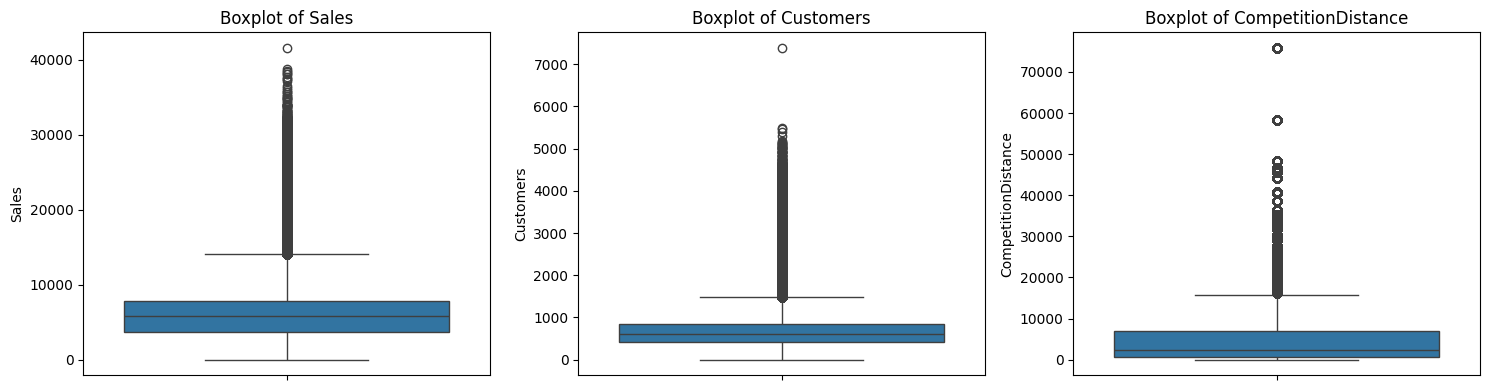

Outlier detection results:
None


In [20]:
# Define the variables for outlier detection
variables = ['Sales', 'Customers', 'CompetitionDistance']

# Check for outliers in the specified variables
outliers = process.check_outlier(variables)

# Print the results of the outlier detection
print("Outlier detection results:")
print(outliers)

## Summary of Outlier Detection

### Findings
- **Sales and Customers**: Both variables exhibit a similar pattern of outliers that are significantly higher than the main data clusters. These outliers may indicate days with unusually high sales or customer visits, likely due to promotions, holidays, or special events.
  
- **CompetitionDistance**: This variable shows outliers that are significantly distant from the main cluster, suggesting that some stores are exceptionally far from their nearest competitor.

### Handling Outliers
There are several approaches to manage outliers effectively:

1. **Trimming**: Remove outliers if they are genuine errors or if they do not contribute meaningfully to the analysis (e.g., data entry errors).

2. **Winsorizing**: Cap the outliers at a certain percentile (e.g., the 99th percentile) to limit the influence of extreme values.

3. **Transformation**: Apply transformations (e.g., logarithmic transformation) to reduce the impact of outliers and often normalize the data.

In [21]:
# Log the handling of outliers
logger.info('Handled Outliers')

# Log transformation example for 'CompetitionDistance'
train_data['CompetitionDistance_log'] = np.log1p(train_data['CompetitionDistance'])
print("Log transformation applied to 'CompetitionDistance'.")

# Winsorizing example for 'Sales' at the 95th percentile
train_data['Sales_winsorized'] = winsorize(train_data['Sales'], limits=[0, 0.05])
print("Winsorizing applied to 'Sales' at the 95th percentile.")

# Similarly Winsorizing for 'Customers'
train_data['Customers_winsorized'] = winsorize(train_data['Customers'], limits=[0, 0.05])
print("Winsorizing applied to 'Customers' at the 95th percentile.")

2025-01-03 18:44:19,644 - INFO - Handled Outliers


Log transformation applied to 'CompetitionDistance'.
Winsorizing applied to 'Sales' at the 95th percentile.
Winsorizing applied to 'Customers' at the 95th percentile.
